In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import numpy as np
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/jarif87/DataSets/main/Customer-Churn-Prediction.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

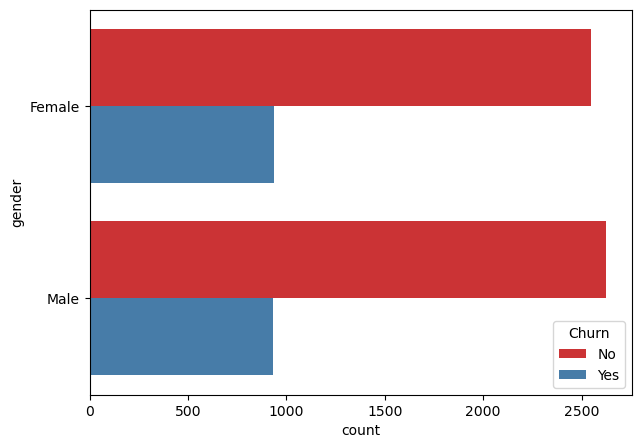

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y="gender", hue="Churn",palette="Set1")
plt.show()

In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

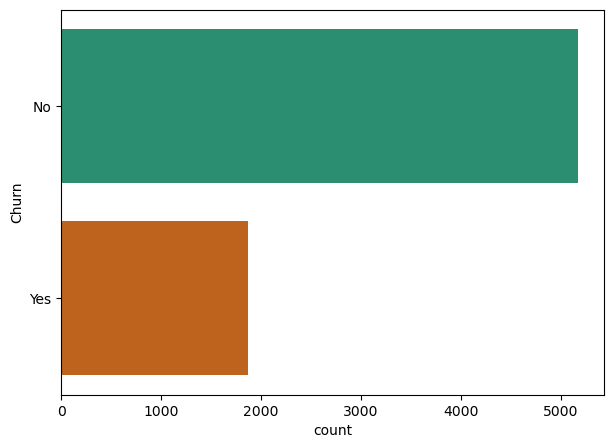

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y="Churn",palette="Dark2")
plt.show()

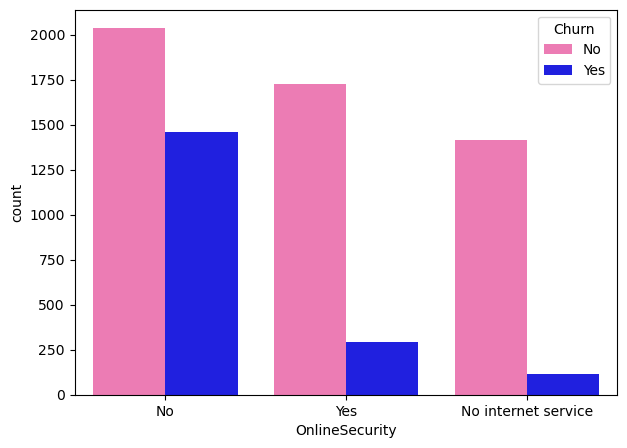

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn",palette=["hotpink","blue"])
plt.show()

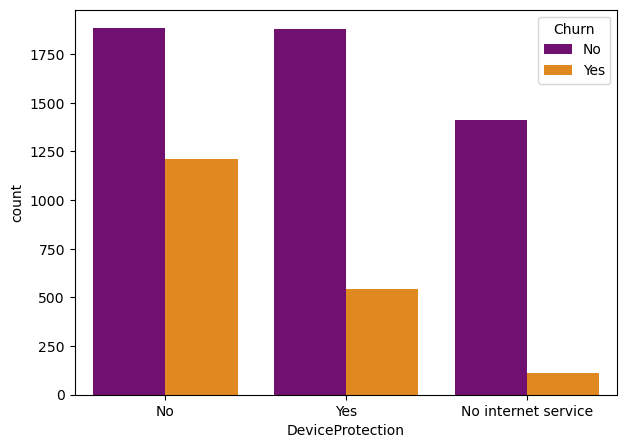

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="DeviceProtection", hue="Churn",palette=["purple","darkorange"])
plt.show()

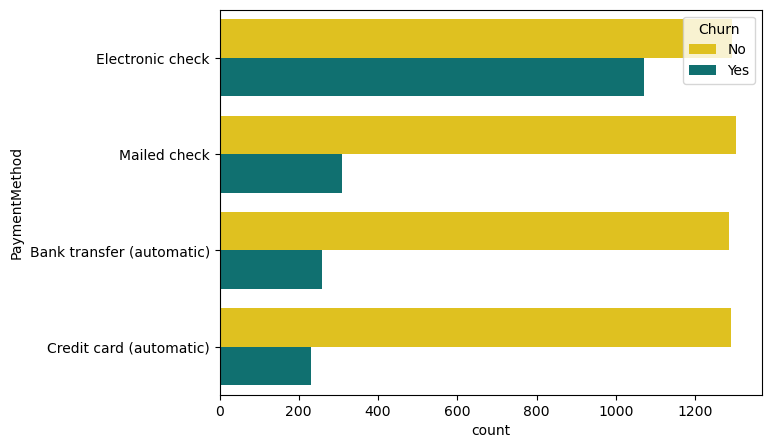

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y="PaymentMethod", hue="Churn",palette=["gold","teal"])
plt.show()

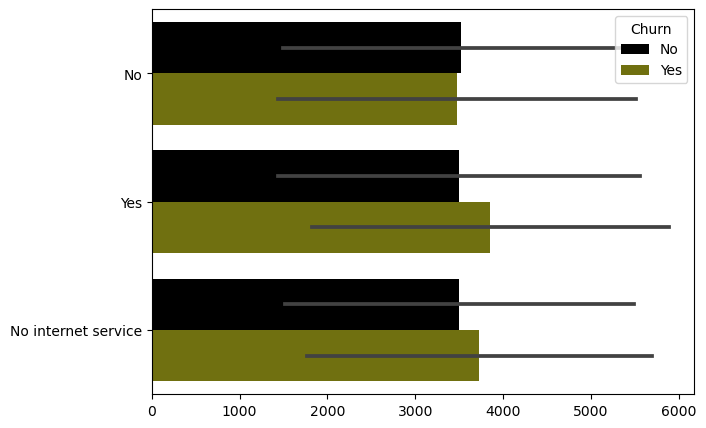

In [15]:

m=df["TechSupport"].index
n=df["TechSupport"].values
plt.figure(figsize=(7,5))
sns.barplot(data=df, x=m, y=n, errorbar="sd",hue="Churn",palette=["black","olive"])
plt.show()

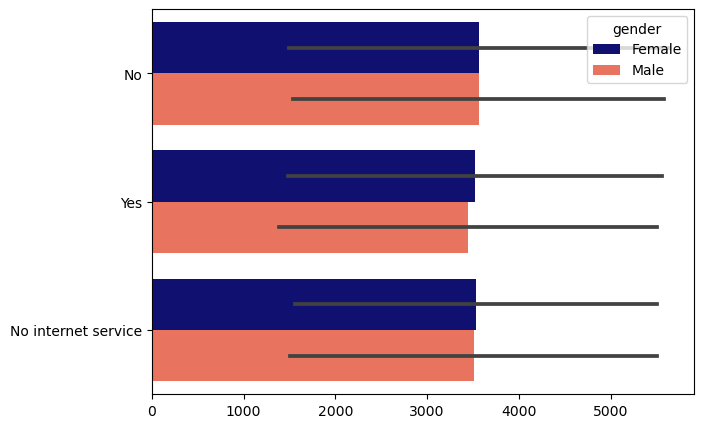

In [16]:
o=df["StreamingMovies"].index
p=df["StreamingMovies"].values
plt.figure(figsize=(7,5))
sns.barplot(data=df, x=o, y=p, errorbar="sd",hue="gender",palette=["navy","tomato"])
plt.show()

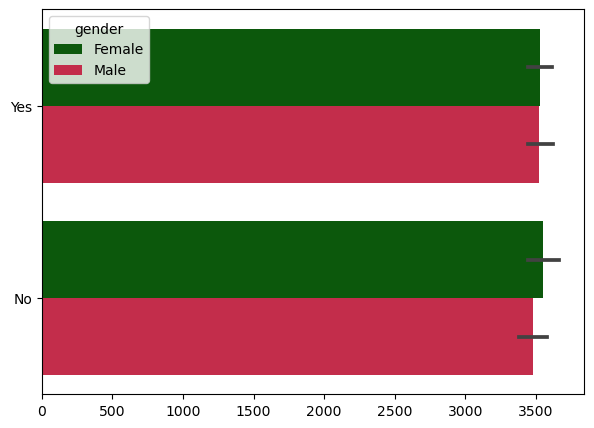

In [17]:
x=df["PaperlessBilling"].index
y=df["PaperlessBilling"].values
plt.figure(figsize=(7,5))
sns.barplot(data=df, x=x, y=y,hue="gender",palette=["darkgreen","crimson"])
plt.show()

In [18]:
df.drop("customerID",axis=1,inplace=True)

# Encoding Data

In [19]:
encoder=LabelEncoder()
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = encoder.fit_transform(df[column])

# Imbalanced Data Handling

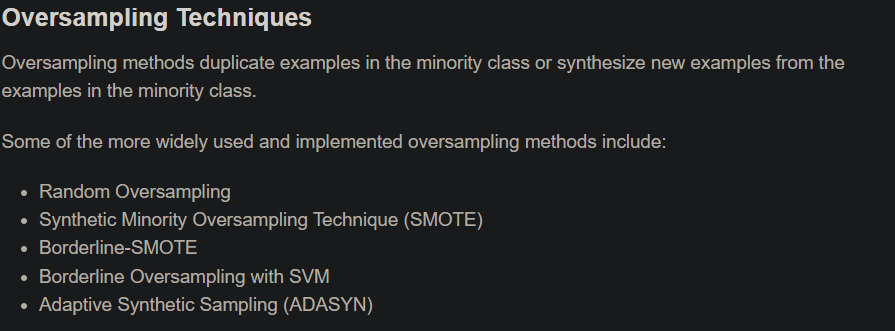

In [20]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


# Seperate Train and Label Data

In [21]:
train_data=df.drop("Churn",axis=1)
label_data=df["Churn"]
print("Train Data Shape :",train_data.shape)
print("Label Data Shape :",label_data.shape)

Train Data Shape : (7043, 19)
Label Data Shape : (7043,)


# Synthetic Minority Oversampling Technique (SMOTETomek)

In [22]:
sm = SMOTETomek(random_state=42)

In [23]:
print("Label Data Counts\n")
label_data.value_counts()

Label Data Counts



0    5174
1    1869
Name: Churn, dtype: int64

In [24]:
X,Y = sm.fit_resample(train_data,label_data)

In [25]:
X.shape

(9610, 19)

In [26]:
Y.shape

(9610,)

In [27]:
Y.value_counts()

0    4805
1    4805
Name: Churn, dtype: int64

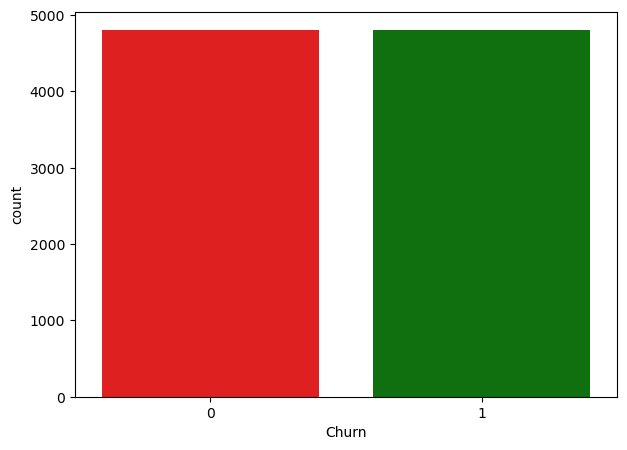

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x=Y,palette=["red","green"])
plt.show()

# BorderlineSMOTE

In [29]:
oversample = BorderlineSMOTE()
X0,Y0 = oversample.fit_resample(train_data,label_data)

In [30]:
print("Train Data Shape :",X0.shape)
print("Label Data Shape :",Y0.shape)

Train Data Shape : (10348, 19)
Label Data Shape : (10348,)


In [31]:
print("Label Counts :\n")
Y0.value_counts()

Label Counts :



0    5174
1    5174
Name: Churn, dtype: int64

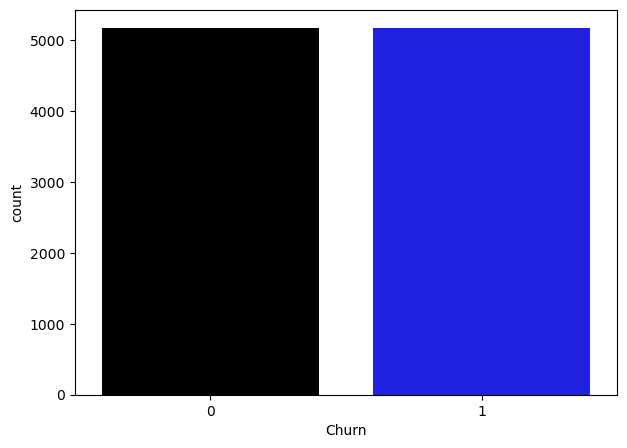

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(x=Y0,palette=["black","blue"])
plt.show()

# Borderline SMOTE SVM

In [33]:
borderline_svm = SVMSMOTE()
X1,Y1= borderline_svm.fit_resample(train_data,label_data)

In [34]:
print("Train Data Shape :",X1.shape)
print("Label Data Shape :",Y1.shape)

Train Data Shape : (10348, 19)
Label Data Shape : (10348,)


In [35]:
counter = Counter(Y1)
counter

Counter({0: 5174, 1: 5174})

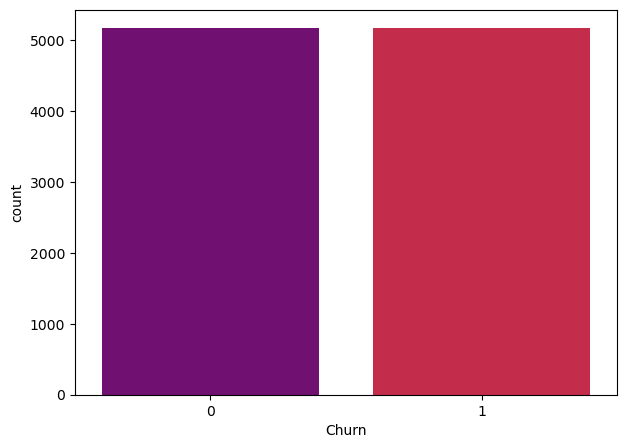

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(x=Y1,palette=["purple","crimson"])
plt.show()

# Adaptive Synthetic Sampling (ADASYN)

In [37]:
ads = ADASYN()
X2,Y2 = ads.fit_resample(train_data,label_data)

In [38]:
print("Train Data Shape :",X2.shape)
print("Label Data Shape :",Y2.shape)

Train Data Shape : (10543, 19)
Label Data Shape : (10543,)


In [39]:
counter = Counter(Y2)
counter

Counter({1: 5369, 0: 5174})

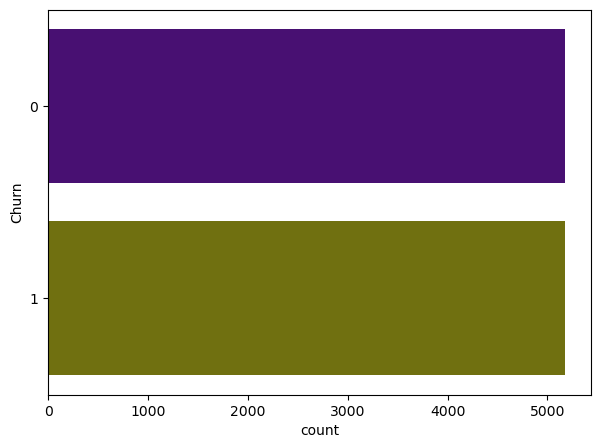

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(y=Y1,palette=["indigo","olive"])
plt.show()

In [41]:
over = RandomOverSampler(random_state=42,sampling_strategy="minority")
X_over, Y_over = over.fit_resample(train_data,label_data)

In [42]:
print("Train Data Shape :",X_over.shape)
print("Label Data Shape :",Y_over.shape)

Train Data Shape : (10348, 19)
Label Data Shape : (10348,)


In [43]:
counter = Counter(Y_over)
counter

Counter({0: 5174, 1: 5174})

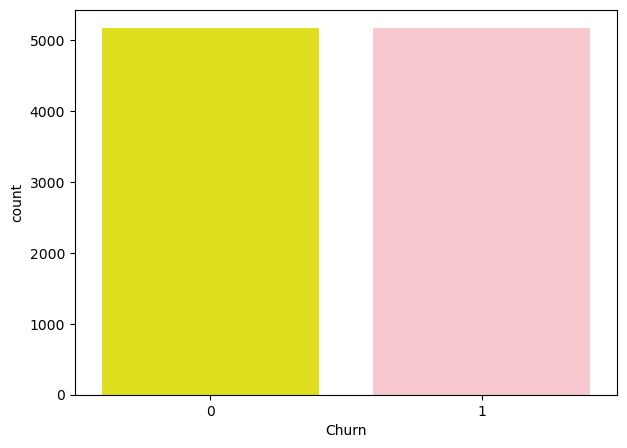

In [44]:
plt.figure(figsize=(7,5))
sns.countplot(x=Y_over,palette=["yellow","pink"])
plt.show()

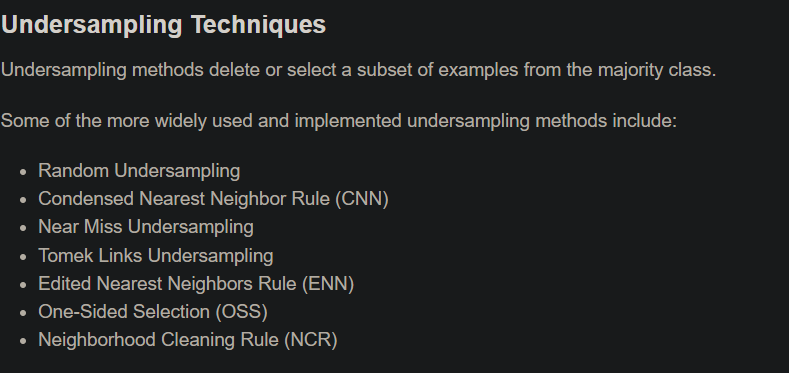

# Near Miss for Under_Sampling

In [45]:
near_miss=NearMiss()
new_train,new_label=near_miss.fit_resample(train_data,label_data)

In [46]:
print("New Label Counts :\n")
new_label.value_counts()

New Label Counts :



0    1869
1    1869
Name: Churn, dtype: int64

In [47]:
print("New Train Data Shape :",new_train.shape)
print("New Label Data Shape :",new_label.shape)

New Train Data Shape : (3738, 19)
New Label Data Shape : (3738,)


In [48]:
counter = Counter(new_label)
counter

Counter({0: 1869, 1: 1869})

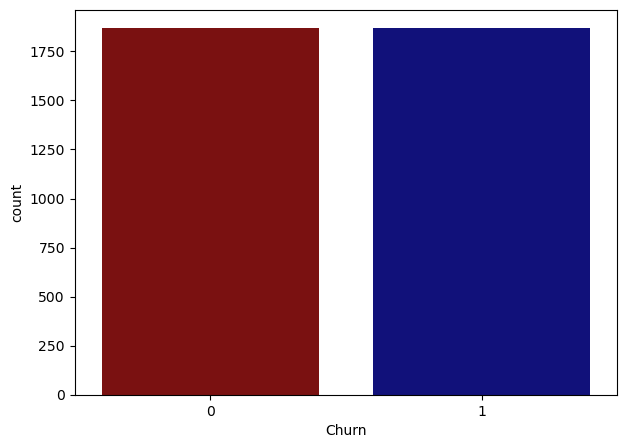

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(x=new_label,palette=["darkred","darkblue"])
plt.show()

# CNN

In [50]:
cnn = CondensedNearestNeighbour(n_neighbors=1)
X4,Y4 = cnn.fit_resample(train_data,label_data)

In [51]:
print("Train Data Shape :",X4.shape)
print("Label Data Shape :",Y4.shape)

Train Data Shape : (3579, 19)
Label Data Shape : (3579,)


In [52]:
counter = Counter(Y4)
counter

Counter({1: 1869, 0: 1710})

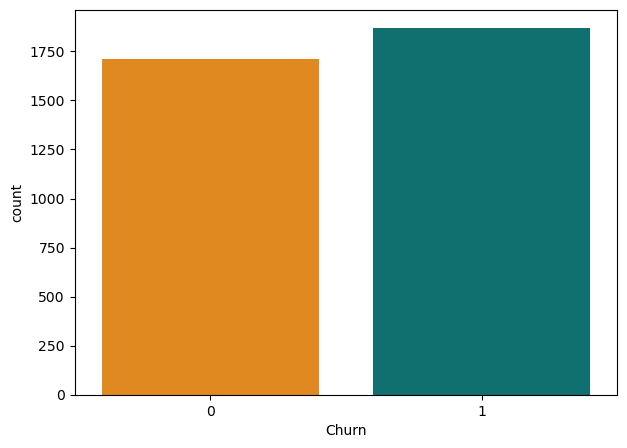

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(x=Y4,palette=["darkorange","teal"])
plt.show()

# OneSidedSelection

In [54]:
oss = OneSidedSelection(random_state=42,sampling_strategy="auto")
X_res, y_res = oss.fit_resample(train_data,label_data)

In [55]:
print("Train Data Shape :",X_res.shape)
print("Label Data Shape :",y_res.shape)

Train Data Shape : (6441, 19)
Label Data Shape : (6441,)


In [56]:
counter = Counter(y_res)
counter

Counter({0: 4572, 1: 1869})

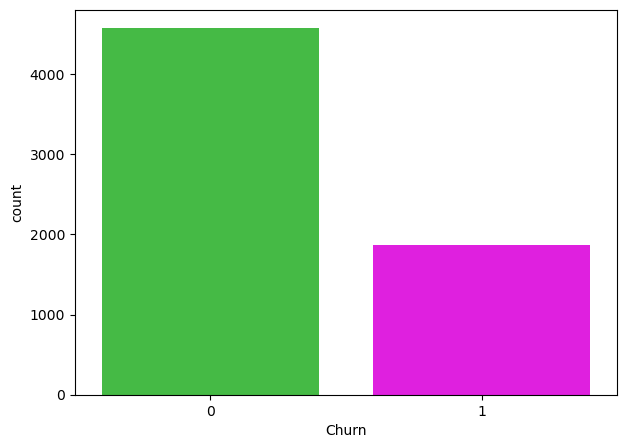

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(x=y_res,palette=["limegreen","magenta"])
plt.show()

# RandomOverSampler

In [58]:

r_sample= RandomOverSampler(random_state=100)
x_new , y_new = over.fit_resample(train_data,label_data)

In [59]:
Counter(y_new)

Counter({0: 5174, 1: 5174})

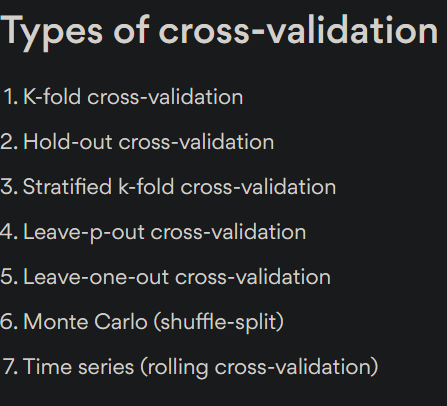

# Hold Out cross Validation

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_over,Y_over, test_size=0.3, random_state=42)

In [61]:
count=Counter(y_train)
count

Counter({1: 3643, 0: 3600})

In [62]:
model=LogisticRegression(max_iter=1000)

In [63]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7800322061191627


# Without Sampling

In [64]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(train_data,label_data, test_size=0.3, random_state=42)

In [65]:
Counter(y_test0)

Counter({0: 1539, 1: 574})

In [66]:
model.fit(X_train0, y_train0)
y_pred0 = model.predict(X_test0)
accuracy = accuracy_score(y_test0, y_pred0)
print("Accuracy:", accuracy)

Accuracy: 0.8078561287269286


# XGBoost Classifier

### Before Cross Validation

In [67]:
model0 = XGBClassifier()
model0.fit(X_train,y_train)
pred=model0.predict(X_test)
accuracy_score(y_test,pred)

0.8615136876006442

# K-Fold Cross-Validation

In [68]:
kfold_validation=KFold(n_splits=5,shuffle=True,random_state=42)

results=cross_val_score(model0,train_data,label_data,cv=kfold_validation)
print(results)


[0.78353442 0.80908446 0.75869411 0.78480114 0.7734375 ]


In [69]:
print("Max value:",results.max())
print("Min Value :",results.min())
print("Mean value :",results.mean())

Max value: 0.8090844570617459
Min Value : 0.758694109297374
Mean value : 0.7819103248596684


# Before Cross Validation

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X4,Y4,test_size=0.2,random_state=42)

In [71]:
model2= XGBClassifier()
model2.fit(x_train,y_train)
pred1=model2.predict(x_test)
accuracy_score(y_test,pred1)

0.6550279329608939

# Stratified k fold cross Validation

In [72]:


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
first_skf = []

for train_index, test_index in skf.split(X4, Y4):
    x_train_fold, x_test_fold = X4.iloc[train_index], X4.iloc[test_index]
    y_train_fold, y_test_fold = Y4.iloc[train_index], Y4.iloc[test_index]
    
    model0.fit(x_train_fold, y_train_fold)
    first_skf.append(model0.score(x_test_fold, y_test_fold))

    
    
print('\nMaximum Accuracy :',max(first_skf)*100, '%')
print('\nMinimum Accuracy:',min(first_skf)*100, '%')
print('\nAverage  Accuracy:',np.mean(first_skf)*100, '%')



Maximum Accuracy : 67.31843575418995 %

Minimum Accuracy: 61.1731843575419 %

Average  Accuracy: 65.0735489726617 %


# Leave One Out Cross Validation

In [73]:
cv = LeaveOneOut()
scores = cross_val_score(model2, X4,Y4, scoring='accuracy', cv=cv, n_jobs=-1)

In [74]:
print("Max value:",scores.max())
print("Min Value :",scores.min())
print("Mean value :",scores.mean())

Max value: 1.0
Min Value : 0.0
Mean value : 0.6543727298127968
